This file includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("C:/Users/Rahul Gauniyal/Downloads/archive (3)/Algerian_forest_fires_dataset.csv")
data.head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [4]:
data.shape

(247, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


DATA CLEANING

In [6]:
data.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [7]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


1. SINCE NOW WE CAN SEE THE DATASET IS DIVIDED INTO TWO PARTS FIRST THE BEJAIA REGION AND THEN THE SIDI-BEL REGION

2. INSTED OF WRITING THEM ONE BY ONE WE WILL MAKE A NEW COLUMN FOR BOTH THE REGION

In [8]:
data.loc[:122,'Region']=0
data.loc[122:,'Region']=1
data['Region'].astype(int)
data.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0


In [9]:
# now we can drop those two rows which were completely blank

data.drop(data.index[[122,123]],inplace=True)
data.reset_index(drop=True,inplace=True)

In [10]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
166,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [11]:
# FOR NOW WE WILL FILL IT WITH MODE
data['Classes  '].fillna(data['Classes  '].mode(),inplace=True)

C:\Users\Rahul Gauniyal\AppData\Local\Temp\ipykernel_38128\775155227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Classes  '].fillna(data['Classes  '].mode(),inplace=True)


In [12]:
#fix Spaces in columns
data.columns=data.columns.str.strip()


In [13]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
# data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
data['day'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [15]:
data.drop(data.index[122],inplace=True)
data.reset_index(drop=True,inplace=True)

In [16]:
data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

data.info()

print(data['Rain'].unique())

type(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), int32(6), object(8)
memory usage: 23.0+ KB
['0' '1.3' '13.1' '2.5' '0.2' '1.2' '0.5' '3.1' '0.7' '0.6' '0.3' '0.1'
 '0.4' '1' '1.4' '0.8' '16.8' '7.2' '10.1' '3.

pandas.core.frame.DataFrame

In [17]:
# Lets find out where that exact value is lying
# data[data.apply(lambda x: x.astype(str).str.contains("14.6 9",na=False)).any(axis=1)]

data['DC'].unique()


data['DC'].replace('14.6 9','14.6',inplace=True)

print(type(data))

<class 'pandas.core.frame.DataFrame'>


C:\Users\Rahul Gauniyal\AppData\Local\Temp\ipykernel_38128\123311510.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DC'].replace('14.6 9','14.6',inplace=True)


In [18]:
type(data)

pandas.core.frame.DataFrame

In [19]:
# Convert the column to numeric (force non-numeric to NaN)
data['FWI'] = pd.to_numeric(data['FWI'], errors='coerce')

# Now, fill NaN with mean
data['FWI'].fillna(data['FWI'].mean(), inplace=True)

C:\Users\Rahul Gauniyal\AppData\Local\Temp\ipykernel_38128\1989874743.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FWI'].fillna(data['FWI'].mean(), inplace=True)


In [20]:

objects=[features for features in data.columns if data[features].dtype=='O']
objects
for i in objects:
    if i!='Classes':
        data[i]=data[i].astype(float)




In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(8), int32(6), object(1)
memory usage: 23.0+ KB


In [22]:
#LETS SAVE CLEANED DATA FILE
data.to_csv('Algerian_forest_fire_Cleaned',index=False)

EXPLORATORY DATA ANALYSIS

In [23]:
#Lets drop date day and month as most of the times they are only used for time series forcasting
data_copy=data.drop(['day','month','year'],axis=1)

In [24]:
#now lets encode classes column
data_copy['Classes']=np.where(data_copy['Classes'].str.contains('not fire'),0,1)

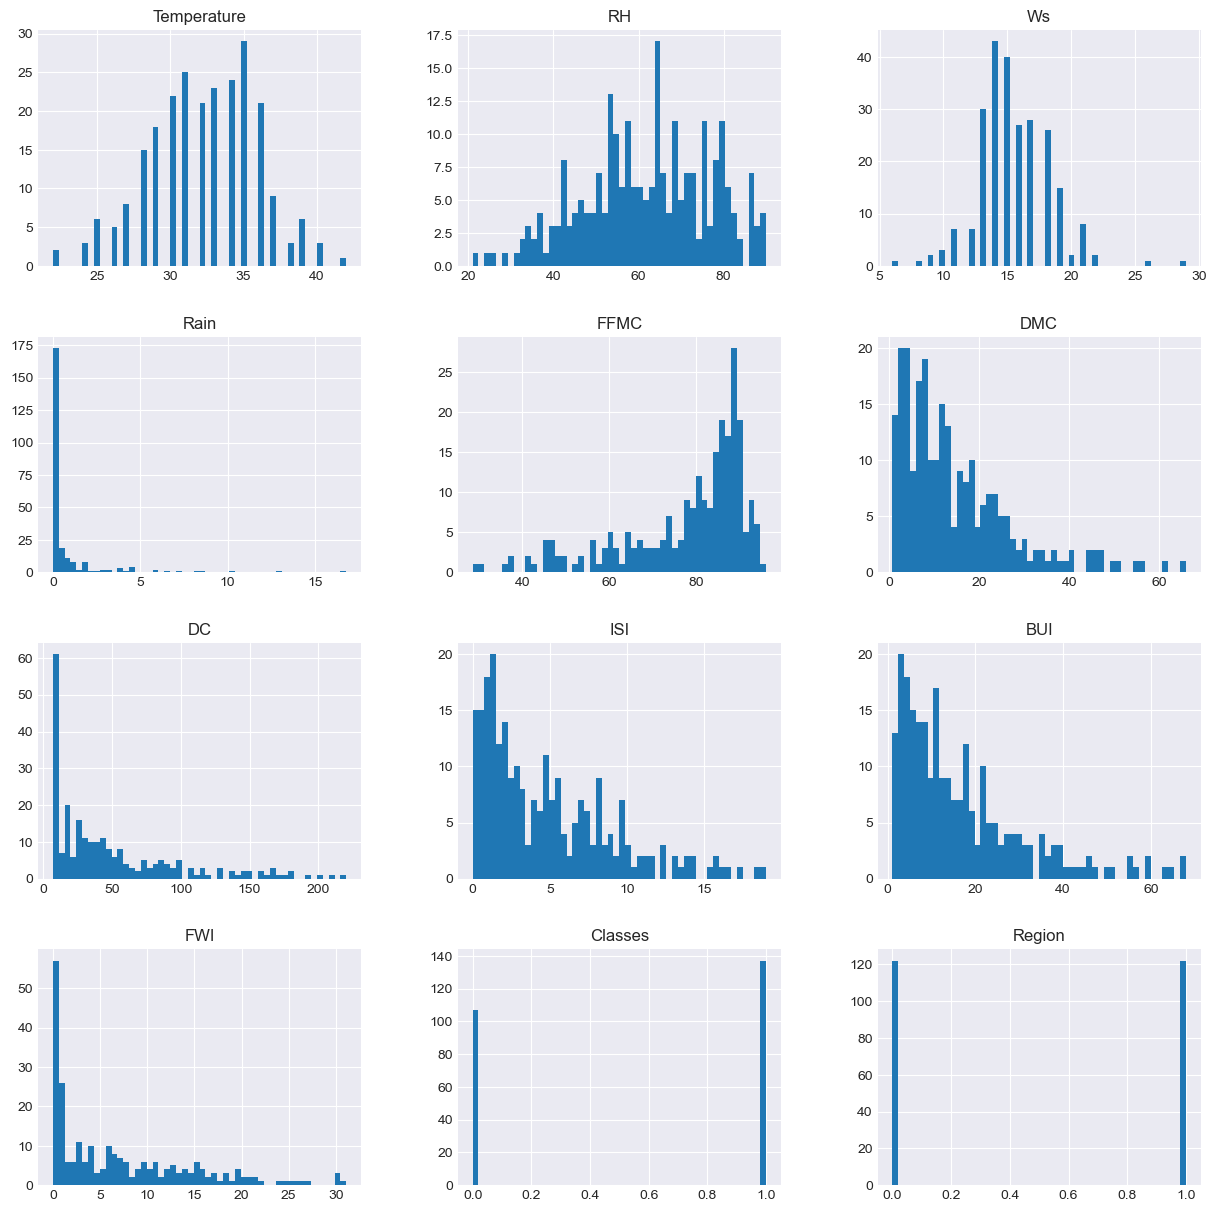

In [25]:
# LETS PLOT density plot function since most of the features are numerical
plt.style.use('seaborn-v0_8-darkgrid')
data_copy.hist(bins=50,figsize=(15,15),layout=(4,3))
plt.show()

In [26]:
percentage=data_copy['Classes'].value_counts(normalize=True)*100

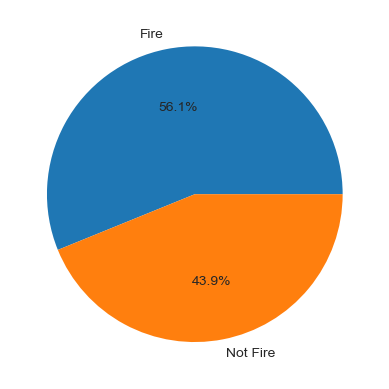

In [27]:
plt.Figure(figsize=(10,10))
lables=['Fire','Not Fire']

plt.pie(percentage,labels=lables,autopct='%1.1f%%')
plt.show()




In [28]:
data_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.564599,0.506575,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.577577,-0.420695,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.032315,-0.073810,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.324369,-0.376727,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.690289,0.762942,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875827,0.584757,0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.738709,0.512615,-0.081489
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.916343,0.719419,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857628,0.586915,0.087370
FWI,0.564599,-0.577577,0.032315,-0.324369,0.690289,0.875827,0.738709,0.916343,0.857628,1.000000,0.717319,0.196696


<Axes: >

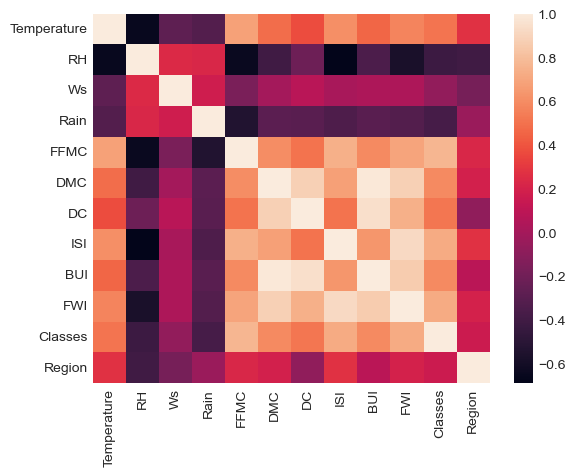

In [29]:
sns.heatmap(data_copy.corr())

<Axes: ylabel='FWI'>

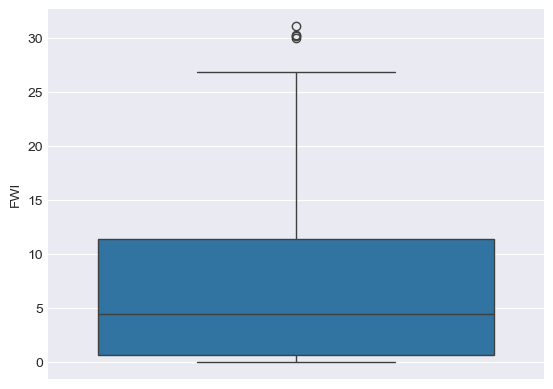

In [30]:
#boxplot

sns.boxplot(data_copy['FWI'])

In [31]:
#lets do monthly fire analysis
data['Classes']=np.where(data['Classes'].str.contains('not fire'),0,1)

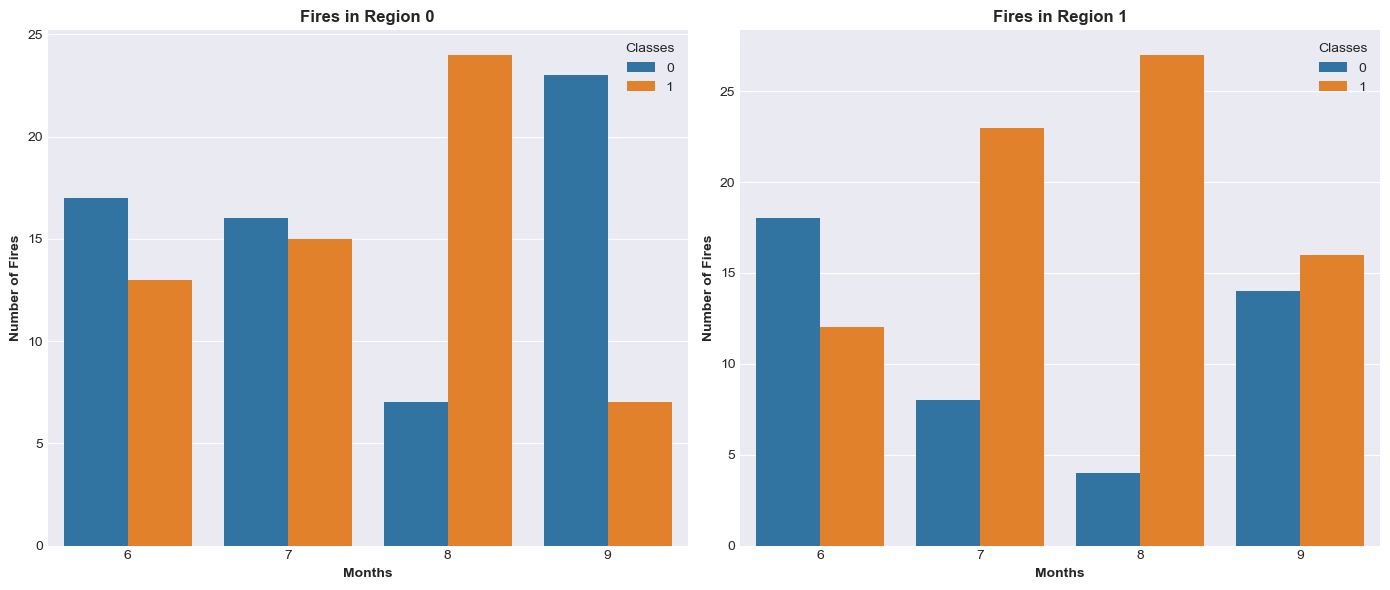

In [32]:
# Create a figure with 1 row & 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Filter data for Region 0 and Region 1
data_region_0 = data.loc[data['Region'] == 0]
data_region_1 = data.loc[data['Region'] == 1]

# First subplot - Region 0
sns.countplot(x='month', hue='Classes', data=data_region_0, ax=axes[0])
axes[0].set_title("Fires in Region 0", weight='bold')
axes[0].set_xlabel("Months", weight='bold')
axes[0].set_ylabel("Number of Fires", weight='bold')

# Second subplot - Region 1
sns.countplot(x='month', hue='Classes', data=data_region_1, ax=axes[1])
axes[1].set_title("Fires in Region 1", weight='bold')
axes[1].set_xlabel("Months", weight='bold')
axes[1].set_ylabel("Number of Fires", weight='bold')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


OBSERVATIONS:-

MOST OF THE FIRES ARE TAKING PLACES IN THE MONTH OF AUG


HEAVY FIRE ARE HAPPENING IN JUNE JULY AND AUGUST IN THE FIRST REGION BUT IN THE SECOND REGION ITS HAPPENING IN JUNE JULY AUGUST SEPTEMBER

# MODEL TRAINING

In [33]:
data_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [34]:
#divide into independent and dependent features

X=data_copy.drop(['FWI'],axis=1)
y=data_copy['FWI']
X.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
115,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0,0.0
181,36,56,16,0.0,88.9,23.8,57.1,8.2,23.8,1,1.0


<Axes: >

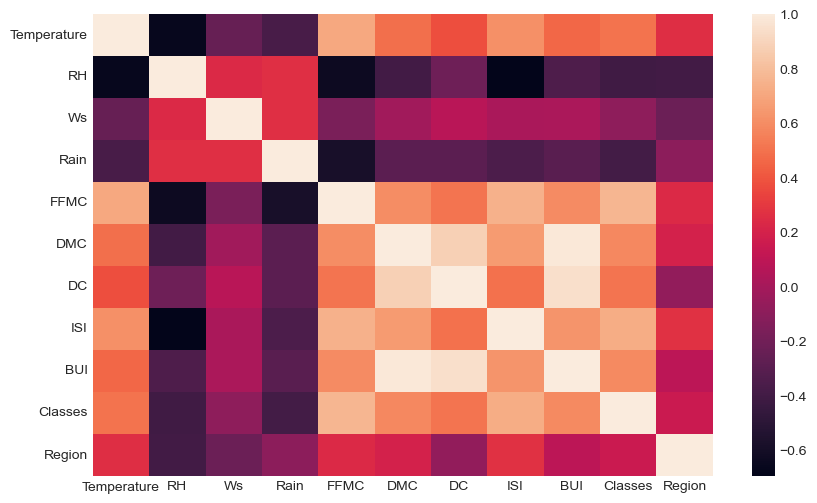

In [36]:
#Check for multicolinearity
plt.figure(figsize=(10,6))
sns.heatmap(X_train.corr())

In [37]:
def correlation(dataset,threshold):
    cor_feature=set()
    corr_mat=dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j]>threshold):
                colname=corr_mat.columns[i]
                cor_feature.add(colname)
    return cor_feature

In [38]:
corr_feature=correlation(X_train,0.85)
corr_feature

X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)



In [39]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'X train after scaled')

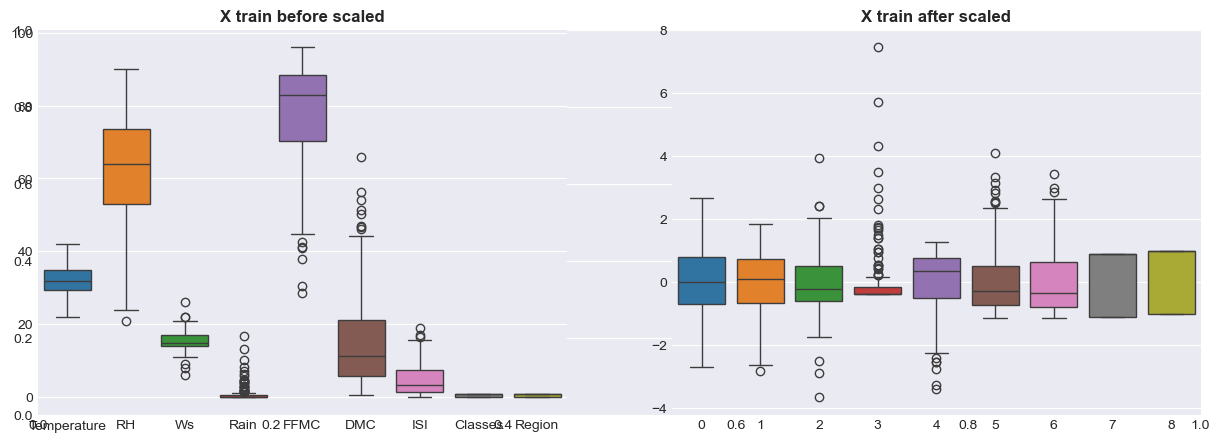

In [40]:
# Check outliars
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title('X train before scaled',weight='bold')

plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title('X train after scaled',weight='bold')



# model training

Mean_squared_error 0.6826895537464839
Mean_absolute_error 0.6260777921286657
Root_Mean_squared_error 0.7912507770161529
r2,score 0.9872483165638248
Adjusted_r2_score 0.9849980194868527


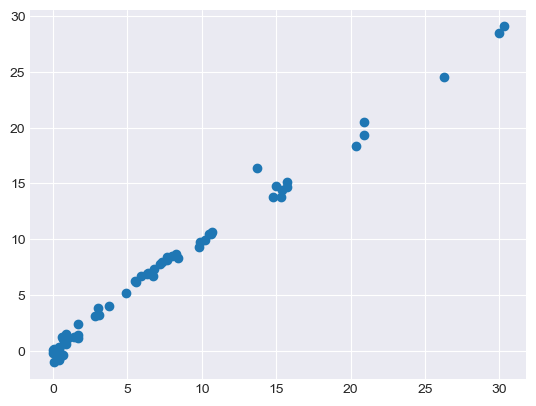

In [41]:
# LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test_scaled)
print('Mean_squared_error', mean_squared_error(y_pred,y_test))
print('Mean_absolute_error', mean_absolute_error(y_pred,y_test))
print('Root_Mean_squared_error', np.sqrt(mean_absolute_error(y_pred,y_test)))

print('r2,score',r2_score(y_pred,y_test))
print('Adjusted_r2_score', 1 - (1-(r2_score(y_pred,y_test))) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))



plt.scatter(y_test,y_pred)




In [42]:
# Lasso Regression


from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
Lasso=Lasso()
Lasso.fit(X_train_scaled,y_train)
y_pred=Lasso.predict(X_test_scaled)
print('Mean_squared_error', mean_squared_error(y_pred,y_test))
print('Mean_absolute_error', mean_absolute_error(y_pred,y_test))
print('Root_Mean_squared_error', np.sqrt(mean_absolute_error(y_pred,y_test)))

print('r2,score',r2_score(y_pred,y_test))
print('Adjusted_r2_score', 1 - (1-(r2_score(y_pred,y_test))) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Mean_squared_error 2.9033552345670213
Mean_absolute_error 1.222772061468996
Root_Mean_squared_error 1.1057902429796511
r2,score 0.9230979062305104
Adjusted_r2_score 0.9095269485064827


In [43]:
#ridge_regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
Ridge=Ridge()
Ridge.fit(X_train_scaled,y_train)
y_pred=Ridge.predict(X_test_scaled)
print('Mean_squared_error', mean_squared_error(y_pred,y_test))
print('Mean_absolute_error', mean_absolute_error(y_pred,y_test))
print('Root_Mean_squared_error', np.sqrt(mean_absolute_error(y_pred,y_test)))

print('r2,score',r2_score(y_pred,y_test))
print('Adjusted_r2_score', 1 - (1-(r2_score(y_pred,y_test))) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Mean_squared_error 0.725596397930423
Mean_absolute_error 0.646413771254004
Root_Mean_squared_error 0.8039986139627381
r2,score 0.9863349497038464
Adjusted_r2_score 0.9839234702398193


In [44]:
# Elasticnet

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
ElasticNet=ElasticNet()
ElasticNet.fit(X_train_scaled,y_train)
y_pred=ElasticNet.predict(X_test_scaled)
print('Mean_squared_error', mean_squared_error(y_pred,y_test))
print('Mean_absolute_error', mean_absolute_error(y_pred,y_test))
print('Root_Mean_squared_error', np.sqrt(mean_absolute_error(y_pred,y_test)))

print('r2,score',r2_score(y_pred,y_test))
print('Adjusted_r2_score', 1 - (1-(r2_score(y_pred,y_test))) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Mean_squared_error 7.2250285342147755
Mean_absolute_error 1.9175981288141106
Root_Mean_squared_error 1.3847736742204881
r2,score 0.7544292524040264
Adjusted_r2_score 0.711093238122384


# Hyperparameter tuning (lasso CV)

In [45]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

lassocv.alpha_

0.028746273810409825

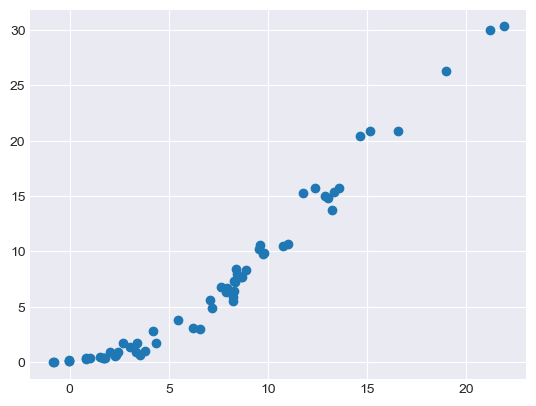

In [46]:
y_pred_lasso=lassocv.predict(X_test_scaled)
plt.scatter(y_pred,y_test)

In [50]:
# Pickling the machine learning model standard scaler and preprocessing

Ridge

Ridge()

In [51]:
scaler

StandardScaler()

In [53]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(Ridge,open('ridge.pkl','wb'))